<center><img src="images/clothing.jpg"></center>

Welcome to the world of e-commerce, where customer feedback is a goldmine of insights! In this project, you'll dive into the Women's Clothing E-Commerce Reviews dataset, focusing on the 'Review Text' column filled with direct customer opinions.

Your mission is to use text embeddings and Python to analyze these reviews, uncover underlying themes, and understand customer sentiments. This analysis will help improve customer service and product offerings.

## The Data

You will be working with a dataset specifically focusing on customer reviews. Below is the data dictionary for the relevant field:

## womens_clothing_e-commerce_reviews.csv

| Column        | Description                           |
|---------------|---------------------------------------|
| `'Review Text'` | Textual feedback provided by customers about their shopping experience and product quality. |

Armed with access to powerful embedding API services, you will process the reviews, extract meaningful insights, and present your findings.

Let's get started!

## Before you start

In order to complete the project you will need to create a developer account with OpenAI and store your API key as a secure environment variable. Instructions for these steps are outlined below.

### Create a developer account with OpenAI

1. Go to the [API signup page](https://platform.openai.com/signup). 

2. Create your account (you'll need to provide your email address and your phone number).

3. Go to the [API keys page](https://platform.openai.com/account/api-keys). 

4. Create a new secret key.

<img src="images/openai-new-secret-key.png" width="200">

5. **Take a copy of it**. (If you lose it, delete the key and create a new one.)

### Add a payment method

OpenAI sometimes provides free credits for the API, but this can vary depending on geography. You may need to add debit/credit card details. 

**This project should cost much less than 1 US cents with `gpt-4o-mini` (but if you rerun tasks, you will be charged every time).**

1. Go to the [Payment Methods page](https://platform.openai.com/account/billing/payment-methods).

2. Click Add payment method.

<img src="images/openai-add-payment-method.png" width="200">

3. Fill in your card details.

### Add an environmental variable with your OpenAI key

1. In the workbook, click on "Environment," in the top toolbar and select "Environment variables".

2. Click "Add" to add environment variables.

3. In the "Name" field, type "OPENAI_API_KEY". In the "Value" field, paste in your secret key.

<img src="images/datalab-env-var-details.png" width="500">

4. Click "Create", then you'll see the following pop-up window. Click "Connect," then wait 5-10 seconds for the kernel to restart, or restart it manually in the Run menu.

<img src="images/connect-integ.png" width="500">

### Update to Python 3.10

Due to how frequently the libraries required for this project are updated, you'll need to update your environment to Python 3.10:

1. In the workbook, click on "Environment," in the top toolbar and select "Session details".

2. In the workbook language dropdown, select "Python 3.10".

3. Click "Confirm" and hit "Done" once the session is ready.

## Load OpenAI API key from environment variables
These variables can be referenced globally throughout the project while keeping their values secret. Good for setting passwords in credentials.

In [2]:
# Initialize your API key
import os

openai_api_key = os.environ["OPENAI_API_KEY"]

## Install useful libraries

In [3]:
# Update OpenAI to 1.3
from importlib.metadata import version
!pip install --upgrade openai
import openai

Defaulting to user installation because normal site-packages is not writeable
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python3 -m pip install --upgrade pip


In [1]:
#!pip install --upgrade pysqlite3-binary
#!pip install protobuf==3.20.1  # Install a compatible version of protobuf
# Run this cell to install ChromaDB if desired
#!pip install --upgrade chromadb
#__import__('pysqlite3')
#import sys
#sys.modules['sqlite3'] = sys.modules.pop('pysqlite3')
#import chromadb

## Load the dataset
Load data and perform basic data checks to ensure you are using relevant data for the analysis

In [4]:
# Load the dataset
import pandas as pd
reviews = pd.read_csv("womens_clothing_e-commerce_reviews.csv")

# Display the first few entries
reviews.head()

,Review ID,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [5]:
# Start coding here
# Use as many cells as you need.
#1. Part 1 - Raw dataset exploration
reviews.shape

(1000, 11)

In [6]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Review ID                1000 non-null   int64 
 1   Clothing ID              1000 non-null   int64 
 2   Age                      1000 non-null   int64 
 3   Title                    810 non-null    object
 4   Review Text              958 non-null    object
 5   Rating                   1000 non-null   int64 
 6   Recommended IND          1000 non-null   int64 
 7   Positive Feedback Count  1000 non-null   int64 
 8   Division Name            1000 non-null   object
 9   Department Name          1000 non-null   object
 10  Class Name               1000 non-null   object
dtypes: int64(6), object(5)
memory usage: 86.1+ KB


In [7]:
reviews.iloc[0] #inspect a sample record

Review ID                                                                  0
Clothing ID                                                              767
Age                                                                       33
Title                                                                    NaN
Review Text                Absolutely wonderful - silky and sexy and comf...
Rating                                                                     4
Recommended IND                                                            1
Positive Feedback Count                                                    0
Division Name                                                      Initmates
Department Name                                                     Intimate
Class Name                                                         Intimates
Name: 0, dtype: object

1. Doing this without ChromaDB

In [8]:
import pandas as pd

2. Preprocess the text to embed:

In [9]:
# Combine Division Name, Department Name, and Class Name into the Review Text
reviews["Enhanced Text"] = reviews.apply(
    lambda row: f"Review: {row['Review Text']} Division: {row['Division Name']}, "
                f"Department: {row['Department Name']}, Class: {row['Class Name']}",
    axis=1
)
reviews.iloc[0]

Review ID                                                                  0
Clothing ID                                                              767
Age                                                                       33
Title                                                                    NaN
Review Text                Absolutely wonderful - silky and sexy and comf...
Rating                                                                     4
Recommended IND                                                            1
Positive Feedback Count                                                    0
Division Name                                                      Initmates
Department Name                                                     Intimate
Class Name                                                         Intimates
Enhanced Text              Review: Absolutely wonderful - silky and sexy ...
Name: 0, dtype: object

3. Preprocess data and meta-data for a more meaningful embedding

In [10]:
# Prepare data for insertion
documents = reviews["Enhanced Text"].fillna("").tolist()  # Embed enhanced review text
ids = reviews["Review ID"].astype(str).tolist()  # Use Review ID as unique identifiers
metadata = reviews.drop(columns=["Review Text", "Enhanced Text"]).to_dict(orient="records")  # All other fields as metadata


In [11]:
documents[0] #Here is an example of the raw text

'Review: Absolutely wonderful - silky and sexy and comfortable Division: Initmates, Department: Intimate, Class: Intimates'

In [12]:
len(ids)

1000

In [13]:
metadata[0] #List of dictionaries containing meta-data about each review record

{'Review ID': 0,
 'Clothing ID': 767,
 'Age': 33,
 'Title': nan,
 'Rating': 4,
 'Recommended IND': 1,
 'Positive Feedback Count': 0,
 'Division Name': 'Initmates',
 'Department Name': 'Intimate',
 'Class Name': 'Intimates'}

4. Read in and embed the documents data using OpenAI's Embedding Function

In [14]:
from openai import OpenAI

client = OpenAI(api_key=openai_api_key)

def create_embeddings(texts):
   response = client.embeddings.create(
     model="text-embedding-3-small",
     input=texts
   )
   response_dict = response.model_dump()
   return [data['embedding'] for data in response_dict['data']]

In [15]:
embeddings = create_embeddings(documents)

5. Inspect the Embeddings

In [19]:
len(embeddings)

1000

6. Create a 2-Dimensional Visualization of the Embeddings using the t-SNE function

In [23]:
from sklearn.manifold import TSNE
import numpy as np

tsne = TSNE(n_components=2, random_state=42)
embeddings_2d = tsne.fit_transform(np.array(embeddings))

In [24]:
embeddings_2d.shape

(1000, 2)

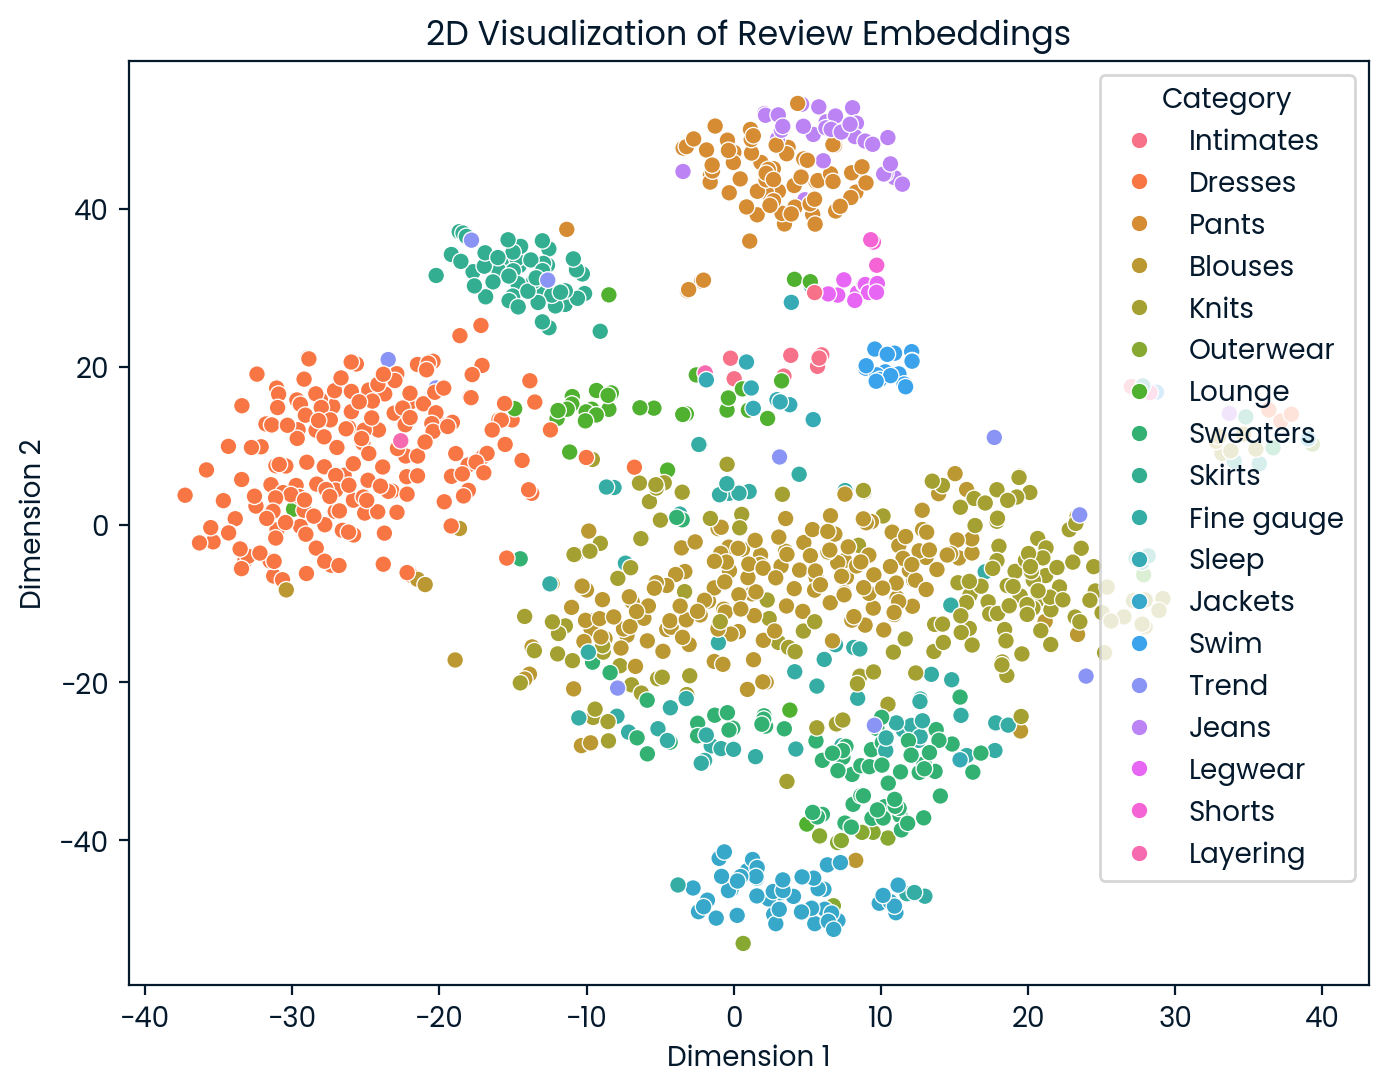

In [27]:
#Another way to plot with Seaborn:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Convert data into a Pandas DataFrame for Seaborn
df = pd.DataFrame({
    "Dimension 1": embeddings_2d[:, 0],
    "Dimension 2": embeddings_2d[:, 1],
    "Category": reviews['Class Name']
})

# Use seaborn's scatter plot with categorical hue
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="Dimension 1", y="Dimension 2", hue="Category")
plt.title("2D Visualization of Review Embeddings")
plt.show()

It looks like reviews about the same item seem to be clustered together based on the keywords used by users. 

7. For the next part I'm using the embeddings to identify reviews that discuss key topics using the following labels:

In [29]:
#Define the topics to be embedded
topics = [
    {'label':'fit'},
    {'label':'style'},
    {'label':'quality'},
    {'label':'comfort'},
    {'label':'price'}
]

label_documents = [topic["label"] for topic in topics]

label_documents

['fit', 'style', 'quality', 'comfort', 'price']

In [32]:
topic_embeddings = create_embeddings(label_documents)
topic_embeddings = np.array(topic_embeddings)

In [33]:
import numpy as np
from scipy.spatial.distance import cdist

def find_closest_topics(query_vectors, document_embeddings):
    """
    Find the closest topic for each document embedding using cosine distance.

    Parameters:
    - query_vectors (np.array): Shape (5, 1536) - Topic embeddings
    - document_embeddings (np.array): Shape (1000, 1536) - Document embeddings

    Returns:
    - closest_topics (list): List of closest topic indices for each document
    - closest_distances (list): Corresponding distances
    """
    # Compute cosine distances between document embeddings and query vectors
    distances = cdist(document_embeddings, query_vectors, metric="cosine")  # Shape (1000, 5)

    # Find the index of the closest topic for each document
    closest_topic_indices = np.argmin(distances, axis=1)  # Shape (1000,)
    
    # Get the corresponding minimum distances
    closest_distances = np.min(distances, axis=1)  # Shape (1000,)

    return closest_topic_indices, closest_distances

# Example usage
closest_topics, closest_distances = find_closest_topics(topic_embeddings, embeddings)

# Print the closest topic for the first 5 documents
for i in range(5):
    print(f"Document {i}: Closest Topic Index = {closest_topics[i]}, Distance = {closest_distances[i]:.4f}")

Document 0: Closest Topic Index = 3, Distance = 0.6976
Document 1: Closest Topic Index = 0, Distance = 0.8112
Document 2: Closest Topic Index = 0, Distance = 0.8055
Document 3: Closest Topic Index = 1, Distance = 0.8080
Document 4: Closest Topic Index = 0, Distance = 0.7809


In [34]:
# Define the topic labels
topic_labels = ["fit", "style", "quality", "comfort", "price"]

# Map indices to topic labels
assigned_topic_labels = [topic_labels[i] for i in closest_topics]

# Print the first few mappings
for i in range(5):
    print(f"Document {i}: Closest Topic = {assigned_topic_labels[i]}")

Document 0: Closest Topic = comfort
Document 1: Closest Topic = fit
Document 2: Closest Topic = fit
Document 3: Closest Topic = style
Document 4: Closest Topic = fit


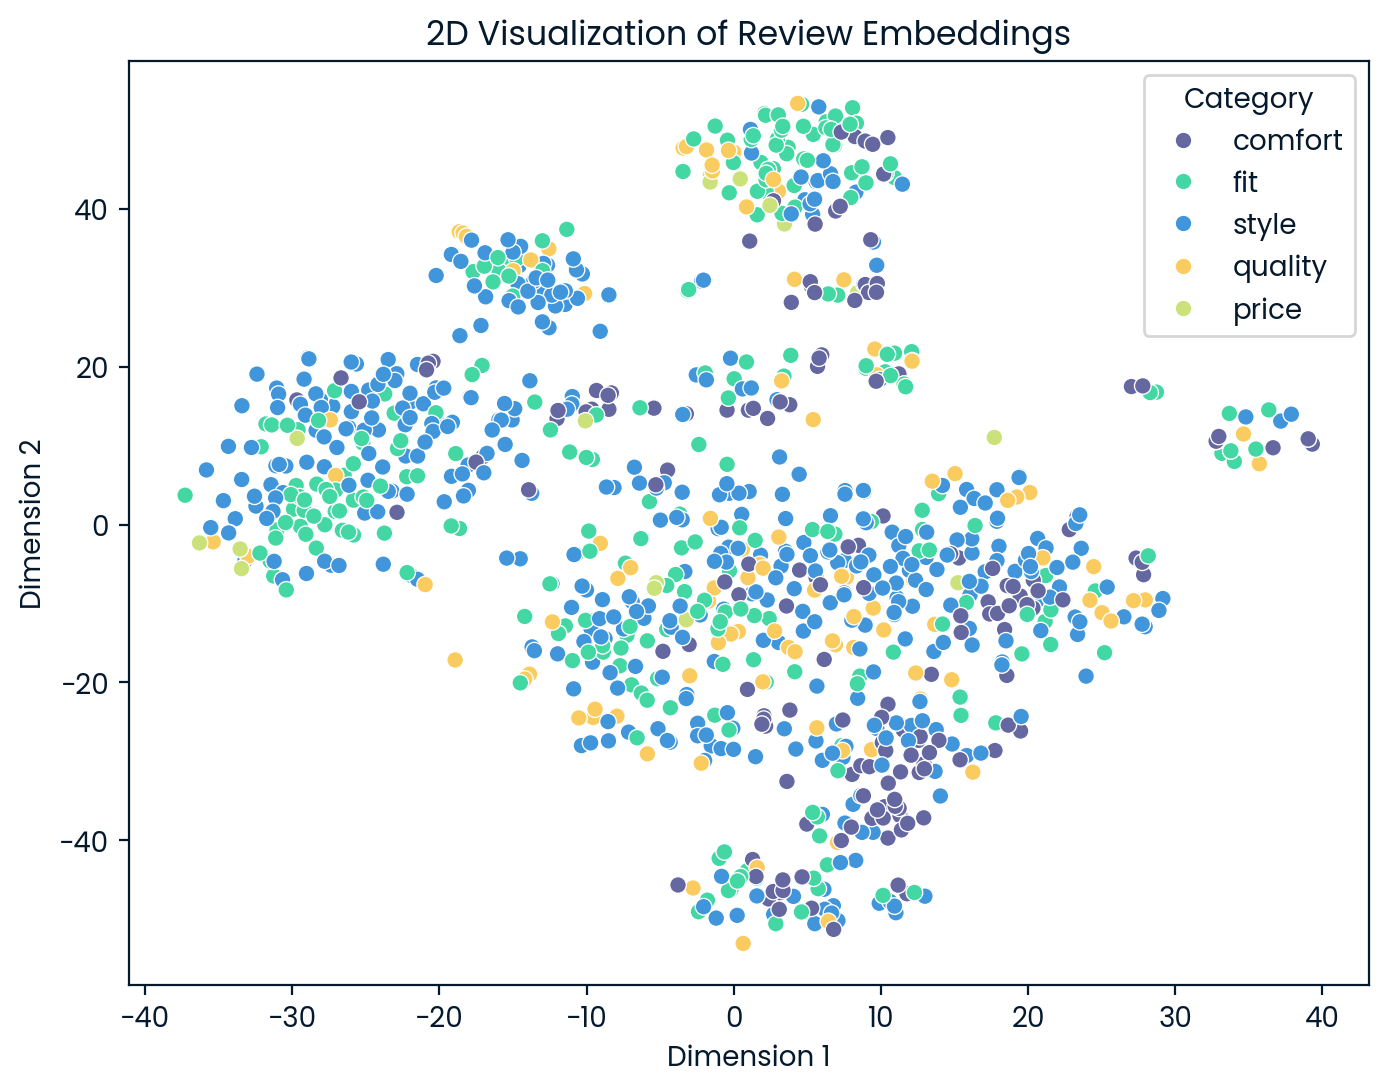

In [35]:
#Another way to plot with Seaborn:
import seaborn as sns
import pandas as pd

# Convert data into a Pandas DataFrame for Seaborn
df = pd.DataFrame({
    "Dimension 1": embeddings_2d[:, 0],
    "Dimension 2": embeddings_2d[:, 1],
    "Category": assigned_topic_labels
})

# Use seaborn's scatter plot with categorical hue
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="Dimension 1", y="Dimension 2", hue="Category")
plt.title("2D Visualization of Review Embeddings")
plt.show()

Topics seem more random and less informative but that's because I added metadata into the embedding. 

8. Add a similarity search to the query as well

In [49]:
def find_top_k_closest(query_vector, embeddings, k=3):
    """
    Find the top k most similar reviews to a given query vector.

    Parameters:
    - query_vector (np.array): Shape (1536,) - Single query embedding.
    - embeddings (np.array): Shape (1000, 1536) - All stored embeddings.
    - k (int): Number of top similar reviews to return.

    Returns:
    - List of dictionaries with top k closest reviews (index & distance).
    """
    # Compute cosine distances between the query vector and all document embeddings
    distances = cdist(query_vector, embeddings, metric="cosine")[0]  # Shape (1000,)

    # Get the indices of the top k closest reviews (sorted by lowest distance)
    top_k_indices = np.argsort(distances)[:k]  # Get indices of top k closest reviews

    # Return results as a list of dictionaries with index & distance
    return [{"index": idx, "distance": distances[idx]} for idx in top_k_indices]


In [50]:
query_text = "Absolutely wonderful - silky and sexy and comfortable"

query_vector = create_embeddings(query_text)
query_vector = np.array(query_vector).reshape(1, -1)

In [51]:
query_vector.shape

(1, 1536)

In [52]:
np.array(embeddings).shape

(1000, 1536)

In [53]:
# Example usage:
top_3_closest = find_top_k_closest(query_vector, np.array(embeddings), k=3)

# Print results
for i, result in enumerate(top_3_closest):
    print(f"Rank {i+1}: Review Index = {result['index']}, Distance = {result['distance']:.4f}")

Rank 1: Review Index = 0, Distance = 0.3415
Rank 2: Review Index = 627, Distance = 0.4593
Rank 3: Review Index = 210, Distance = 0.5037


In [55]:
most_similar_reviews = [reviews['Review Text'].iloc[0], 
                           reviews['Review Text'].iloc[627],
                           reviews['Review Text'].iloc[210]]

most_similar_reviews

['Absolutely wonderful - silky and sexy and comfortable',
 'This is a very comfortable and sexy sleep dress, the way it drapes. i can see that the type of fabric is not suitable for out and about activities and can catch on snags, etc. very easily. once i relegated it to the nightgown category it became my favorite item to wear and lounge in.',
 'I have already worn this several times. it is very flattering, lightweight, and easy to wear. dressy but also very soft and comfortable.']